## Imports

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pointbiserialr
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare, chi2_contingency

## 01:  Fetch data

In [2]:
dt = pd.read_csv('Auto_Insurance_Claims_Sample.csv')

In [4]:
def cramers_corrected_stat(train_dt,chi_test_stats,crosstab):

    n = len(dt)
    phi = chi_test_stats/n
    r,k = crosstab.shape    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    #print(n,phi,r,k)
    return np.sqrt(phi / min( (kcorr-1), (rcorr-1)))

In [6]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [5]:
dt

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


## 02: Basic EDA

1. What is the dtype of each feature? 

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [7]:
dt.dtypes.value_counts()

object     18
int64       6
float64     2
dtype: int64

__Observation:__  
1. There are 18 object type data fields, 6 int64 type and 2 are float64.

2. What is heatmap of the data? (It may not be correct but it will give an idea)

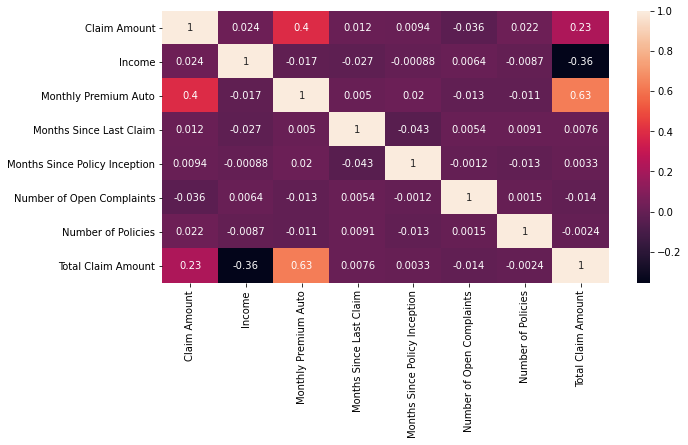

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
corrMatrix = dt.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

3. What is the distribution of numerical variables? 

In [9]:
dt.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


__Observations:__
1. Minimum claim amount is almost 190 but interesting the mean is almost 801 which is very close to 3th quartile (896) which suggest skewness in the data because median is 578. Maximum of claim is bit weird but requires more investigation because it can be justifiable.
2. Minimum income and about 25% sample has income equals to 0 which needs to be adjusted in data cleaning. 
3. Interestingly 3rd quartile of monthly premium is almost double of minimum premimum. 
4. About 50% of sample haven't claim in last 1 year and 2 months.
5. Half of the policies are 4 years old. 
6. Most of the clients have one or two policies (1st and 2nd quartile)
7. Interestingly the minimum total amount of claim is almost 0 which needs further investigation. The mean and median have difference of 200 which indicate skewness in the data. Maximum is again bit werid. 

4. What is the distribution of categorical variables? 

In [10]:
dt.describe(include='O')

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,1,5,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,IZ17303,US,MO,Missouri,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Four-Door Car,Medsize
freq,1,9134,3150,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


__Observations:__
1. Most of them are bachelors. 
2. Most of them are employeed. 
3. Females are more in numbers. 
4. Most of them are married. 
5. Personal Auto is the most frequently purchased insurance policy. 
6. Collision is the most common reason of claims. 
7. Most of them are four door car and medsize vehicles.
8. Most of of them have basic coverage. 
9. missouri has the highest number of claims. 
10. Most of the claims are from sub-urban locations. 


## Assumptions to begin with. 

1. Employeed customers will have high amount of claims because they have to travel everyday to their workplace there are more chances of accident then to some who is most of time at home (such as unemployed or on medical leaves).
2. Bachelors maybe have high claims because most of them are irresponsible in this period of life.
3. Female are rash drivers so they might have high claims. 
4. Conflict in marriage can increase the chances of accident.
5. medsize are cars may have less amount of claims then large cars. 
6. SUVs, luxury SUV, luxury Car may have high amount of claims then four-door ordinary cars. 
7. Maybe different locations have different type of claims (missori may have claims due to collision and xyz location may have claims due to hail etc) 
8. Maybe different class of cars have different type of coverage. 
9. Maybe different class of cars have different type of policy. 
10. Those who are paying more premium will likely have more claim amount. 
11. Number of policies can increase the chances of claims. 
12. Those who have high claim amount will unlikely have basic type of coverage. 
13. The claims amount might increase with the number of months since last claims. 
14. Age of policy might have an impact on the claims amount. 

## 03 : Univariate and Bivariate Analysis:

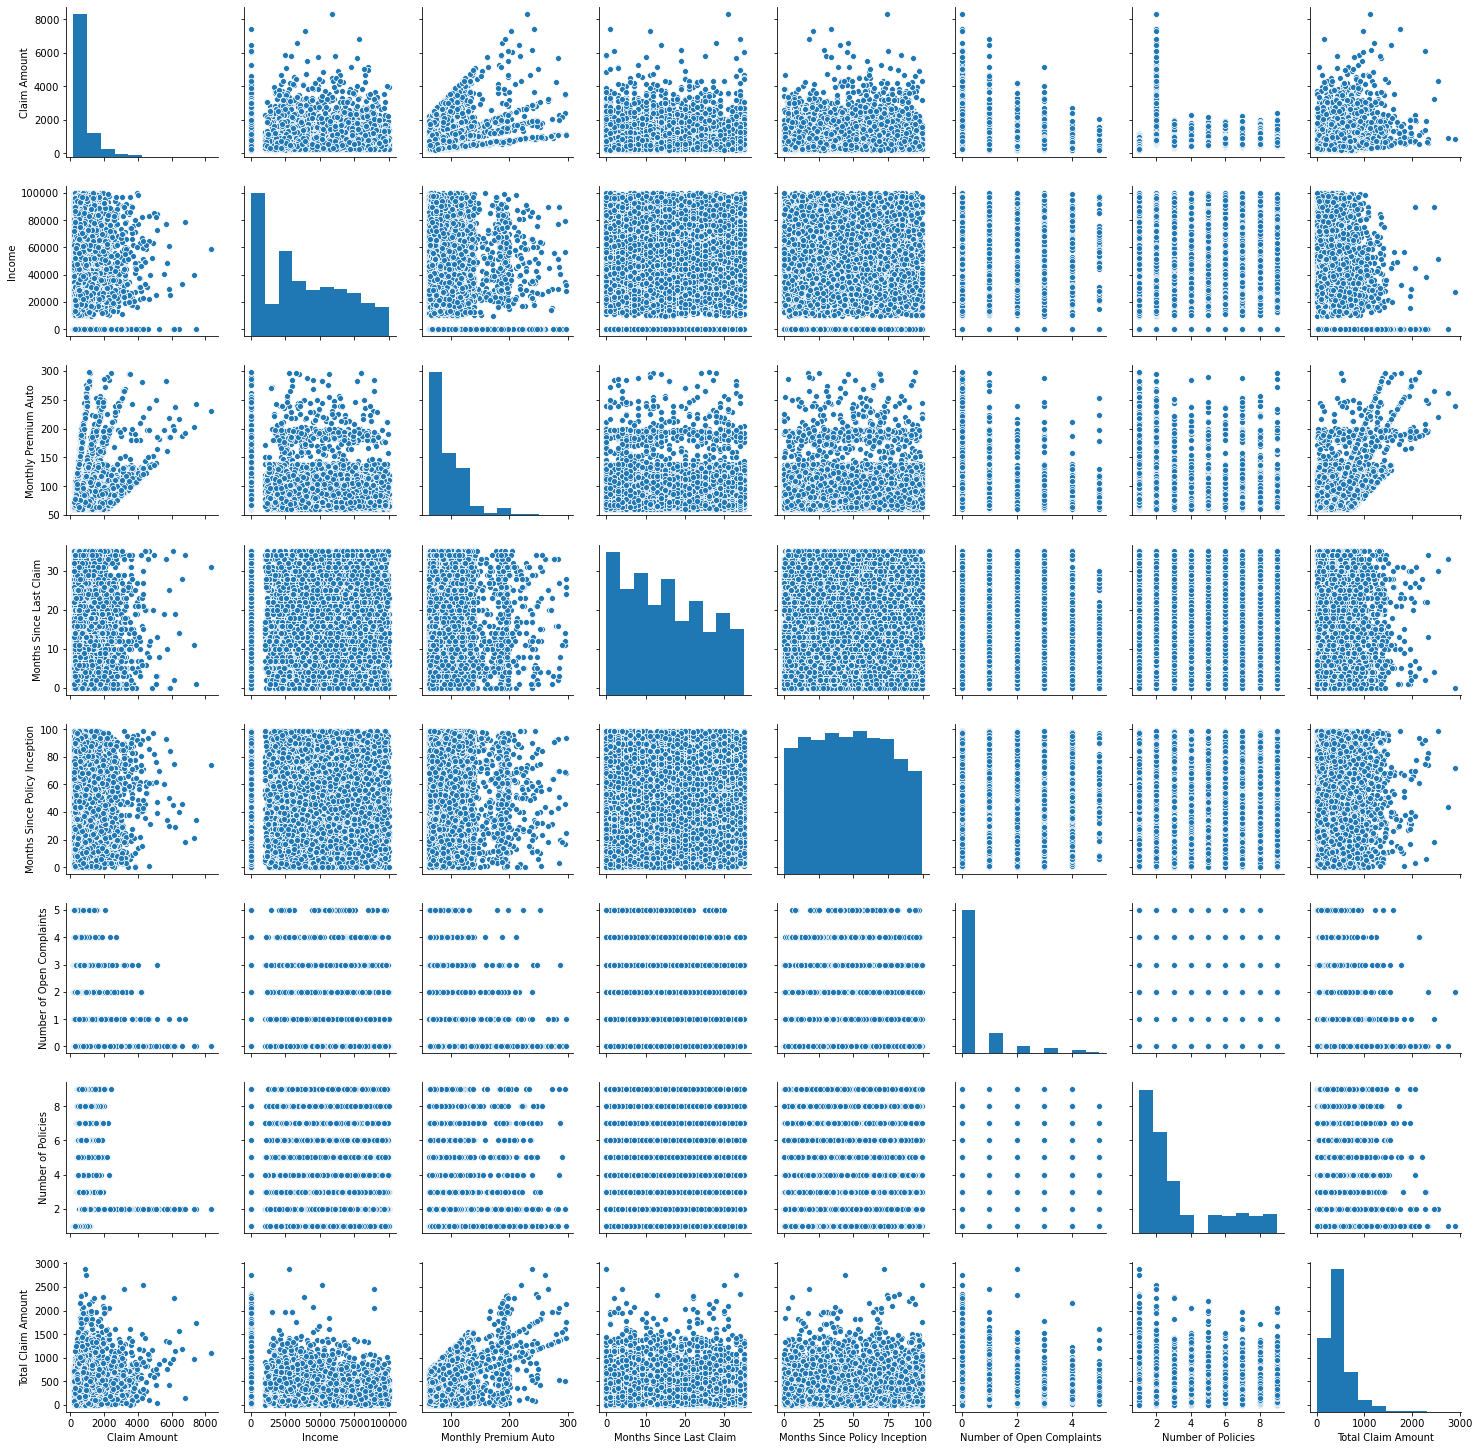

In [11]:
sns.pairplot(data=dt)

(array([7.260e+03, 1.193e+03, 4.130e+02, 1.540e+02, 7.500e+01, 2.000e+01,
        1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 189.8007675 , 1004.07450265, 1818.3482378 , 2632.62197295,
        3446.8957081 , 4261.16944325, 5075.4431784 , 5889.71691355,
        6703.9906487 , 7518.26438385, 8332.538119  ]),
 <a list of 10 Patch objects>)

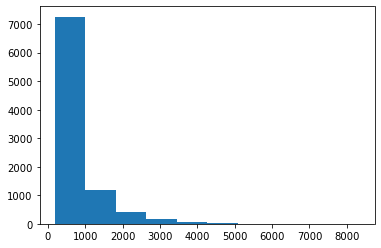

In [12]:
#Checking distribution of our target variable
x=dt['Claim Amount']
plt.hist(x)

In [13]:
dt['Claim Amount'].describe()

count    9134.000000
mean      800.494047
std       687.096761
min       189.800768
25%       399.425179
50%       578.018220
75%       896.216704
max      8332.538119
Name: Claim Amount, dtype: float64

In [14]:
(dt['Claim Amount']>8000).value_counts()

False    9133
True        1
Name: Claim Amount, dtype: int64

In [15]:
(dt['Claim Amount']>7000).value_counts()

False    9131
True        3
Name: Claim Amount, dtype: int64

In [16]:
(dt['Claim Amount']>6000).value_counts()

False    9125
True        9
Name: Claim Amount, dtype: int64

__Observation:__  
1. Maximum Claim Amount is 8332.538  
2. Minimum Claim Amount is 189
3. Difference between the highest and second highest claim amount is 910 (which is huge)
3. There are only 9 values out of 9134 that are greater than 6000.

------------------------------

### Working on Assumptions

1. Employeed customers will have high amount of claims because they have to travel everyday to their workplace there are more chances of accident then to some who is most of time at home (such as unemployed or on medical leaves)

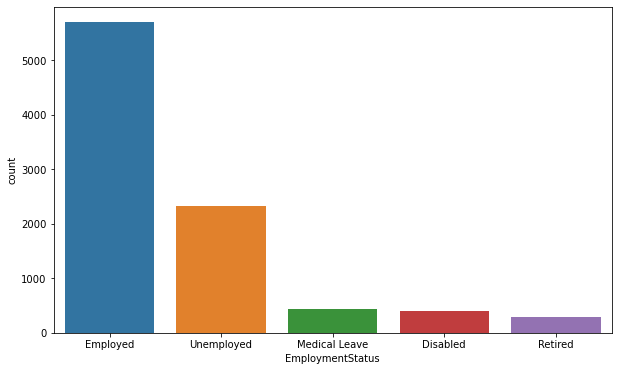

In [17]:
#Ploting distribution of EmployementStatus
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(dt['EmploymentStatus'])

In [18]:
dt['EmploymentStatus'].value_counts()/len(dt)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

__Observation:__  
1. 62% of the claims are from the Employed, 25% are Unemployed, rest 12 percent are Disabled, Retired or on medical leaves

Text(0, 0.5, 'Claim Amount')

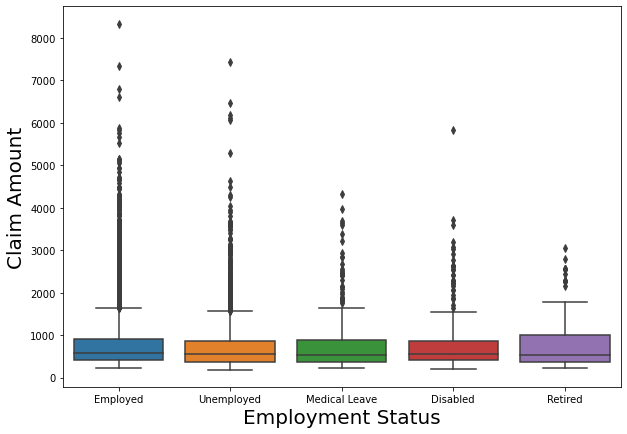

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='EmploymentStatus', y='Claim Amount', data=dt)
plt.xlabel('Employment Status',size=20)
plt.ylabel('Claim Amount',size=20)

mean-difference. 

In [20]:
agg = dt[['EmploymentStatus','Claim Amount']].groupby(by=['EmploymentStatus'])['Claim Amount'].median().reset_index()

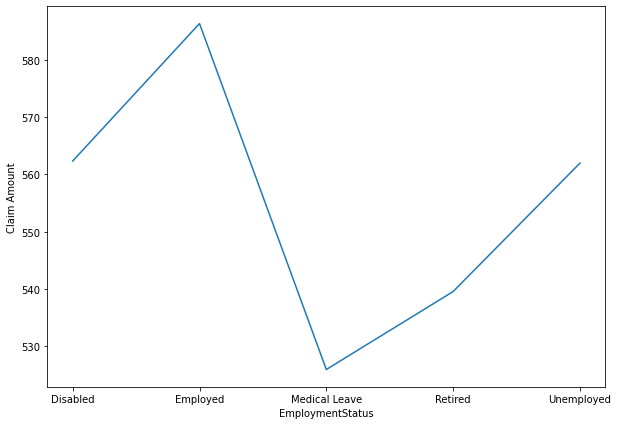

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x='EmploymentStatus', y='Claim Amount', data=agg,ci=False)

Text(0, 0.5, 'Claim Amount')

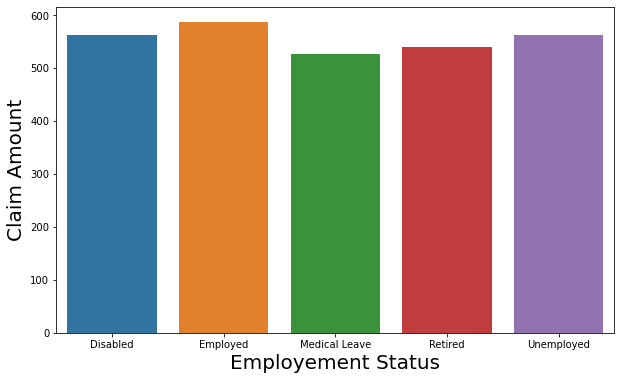

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='EmploymentStatus', y='Claim Amount', data=agg,ci=False)
plt.xlabel('Employement Status',size=20)
plt.ylabel('Claim Amount',size=20)

Compute Correlation

__Observations__:
1. The median claim amount of employeed is higher than the rest of the employee status.
2. Our assumption was right that employeed have hight claim amount 

<b>2. Bachelors maybe have high claims because most of them are irresponsible in this period of life.</b>

In [23]:
dt['Education'].value_counts()/len(dt)*100

Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: Education, dtype: float64

In [24]:
agg = dt[['Education','Claim Amount']].groupby(by=['Education'])['Claim Amount'].median().reset_index()

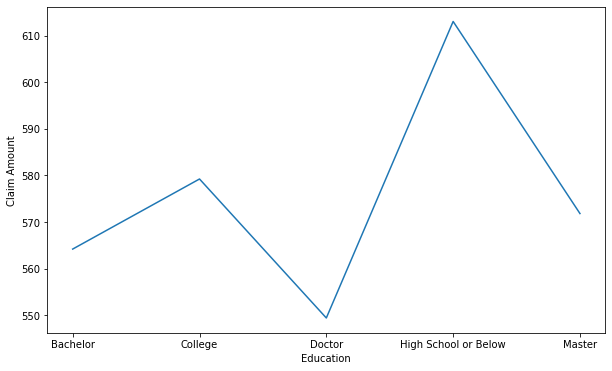

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='Education', y='Claim Amount', data=agg,ci=False)

Text(0, 0.5, 'Claim Amount')

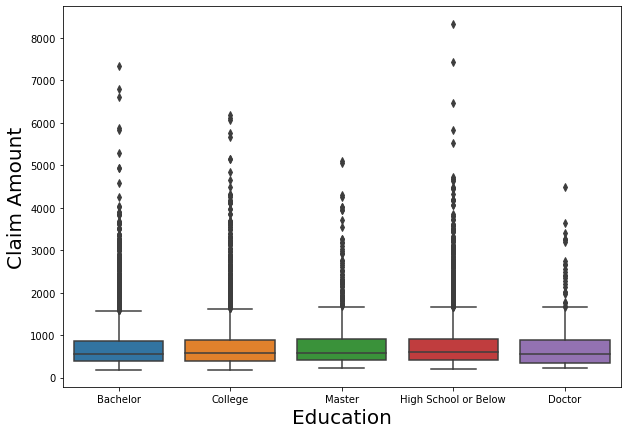

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='Education', y='Claim Amount', data=dt)
plt.xlabel('Education',size=20)
plt.ylabel('Claim Amount',size=20)

In [27]:
agg=dt.groupby(by=['Education'])['Claim Amount'].median().reset_index()

Text(0, 0.5, 'Claim Amount')

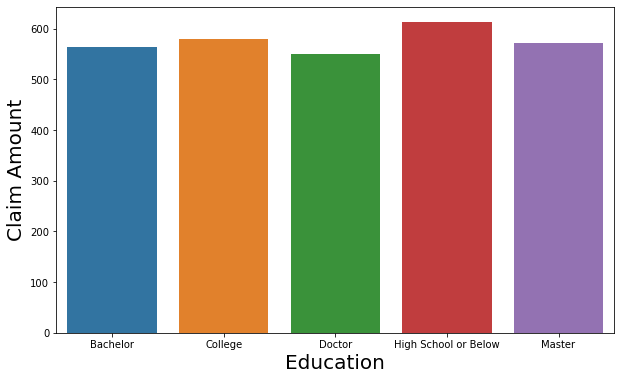

In [28]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='Education',y='Claim Amount',data=agg)
plt.xlabel("Education",size=20)
plt.ylabel('Claim Amount',size=20)

__Observation:__  -
1. Customers having education High school or below have highest claim amount.  
2. Doctors have the lowest Claim Amount
3. Our assumption that bachelors will have the highest claim amounts fails
4. Bachelors, college and High school have the majority of the claims

__3. Female are rash drivers so they might have high claims.__

In [29]:
Male = dt[dt['Gender']=='M']
Female= dt[dt['Gender']=='F']

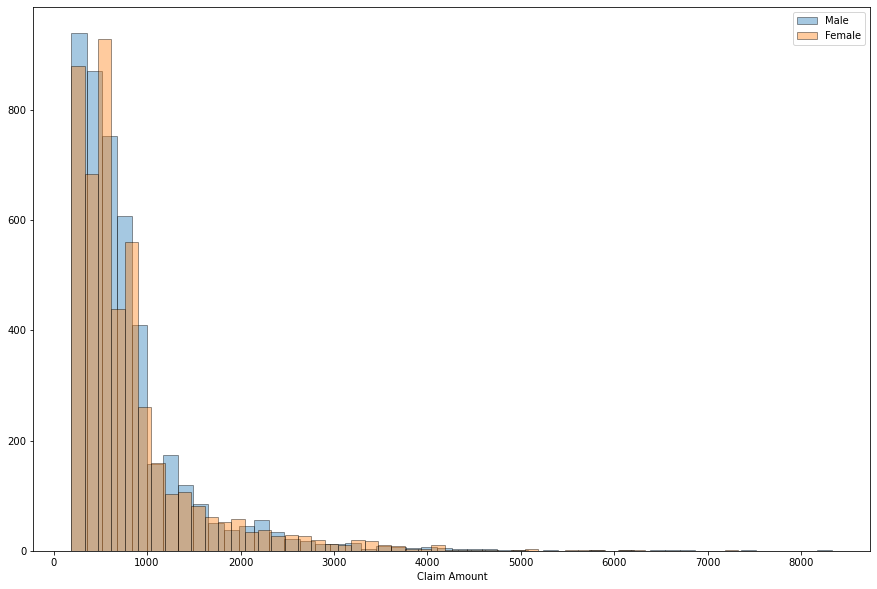

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(Male['Claim Amount'], kde=False, hist_kws={'edgecolor':'black'})
sns.distplot(Female['Claim Amount'], kde=False, hist_kws={'edgecolor':'black'})
plt.legend(['Male','Female'])

In [33]:
#replacing M with 0 and F with 1
dt['encoded_gender'] = dt['Gender'].apply(lambda x: 0 if x=='M' else 1)

In [34]:
# get continuous and dichotomous data
v1 = dt['Claim Amount']
v2 = dt['encoded_gender']

# pbc of Gender
pbc = pointbiserialr(v2, v1)
print(pbc)

PointbiserialrResult(correlation=0.013609726798193262, pvalue=0.19339865630501551)


__Observation:__  
1.Our Assumption was wrong, visual analysis and point biserial correlation suggests that there is no significant affect of gender on claim amount. 

__4. Conflict in marriage can increase the chances of accident.__

In [31]:
pd.crosstab(dt['Marital Status'],dt['Claim Reason']).apply(lambda x: x/x.sum(),axis=1)

Claim Reason,Collision,Hail,Other,Scratch/Dent
Marital Status,,,,
Divorced,0.514974,0.264427,0.078890,0.141709
Married,0.338618,0.362401,0.134390,0.164590
Single,0.507904,0.261046,0.082692,0.148358


In [32]:
MaritalClaimReason = pd.crosstab(dt['Marital Status'],dt['Claim Reason'])
MaritalClaimReason

Claim Reason,Collision,Hail,Other,Scratch/Dent
Marital Status,,,,
Divorced,705,362,108,194
Married,1794,1920,712,872
Single,1253,644,204,366


In [33]:
testStatistic, pVal, dof, contigencyTab = chi2_contingency(MaritalClaimReason)

In [34]:
print('Test Statistics', testStatistic, 'P-Value',pVal, 'contigencyTab', contigencyTab)

Test Statistics 290.83287032945225 P-Value 7.526872331229618e-60 contigencyTab [[ 562.34814977  438.54762426  153.47668053  214.62754543]
 [2176.27501642 1697.16969564  593.95139041  830.60389753]
 [1013.37683381  790.2826801   276.57192906  386.76855704]]


Cramers' V

In [35]:
cramers_corrected_stat(dt,testStatistic,MaritalClaimReason)

0.12618966886663524

__Observation:__   
The Value of cramer's V is 0.126, which is near zero,it means though there is association the strength of association is not very high.

__5. medsize are cars may have less amount of claims then large cars__

In [36]:
dt['Vehicle Size'].value_counts()/len(dt)*100

Medsize    70.330633
Small      19.312459
Large      10.356908
Name: Vehicle Size, dtype: float64

Text(0, 0.5, 'Count')

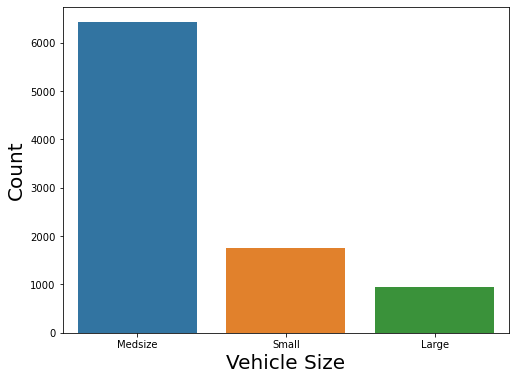

In [37]:
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(dt['Vehicle Size'])
plt.xlabel('Vehicle Size',size = 20)
plt.ylabel('Count',size=20)

In [38]:
temp = dt[['Vehicle Size','Claim Amount']].groupby(by=['Vehicle Size'])['Claim Amount'].median().reset_index()

Text(0, 0.5, 'Claim Amount')

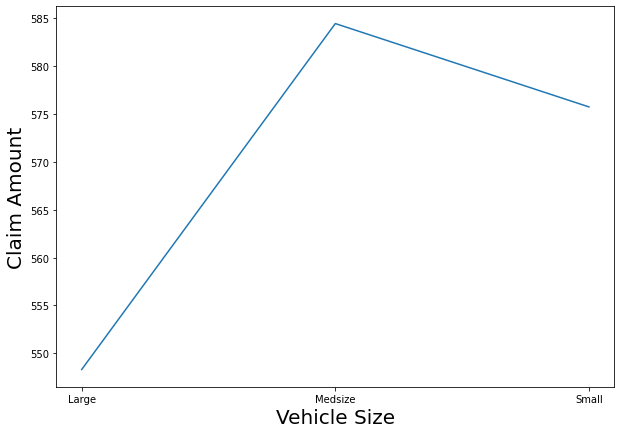

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x='Vehicle Size', y='Claim Amount', data=temp,ci=False)
plt.xlabel('Vehicle Size',size=20)
plt.ylabel('Claim Amount',size=20)

__

<b>6. SUVs, luxury SUV, luxury Car may have high amount of claims then four-door ordinary cars.</b>

Text(0, 0.5, 'Claim Amount')

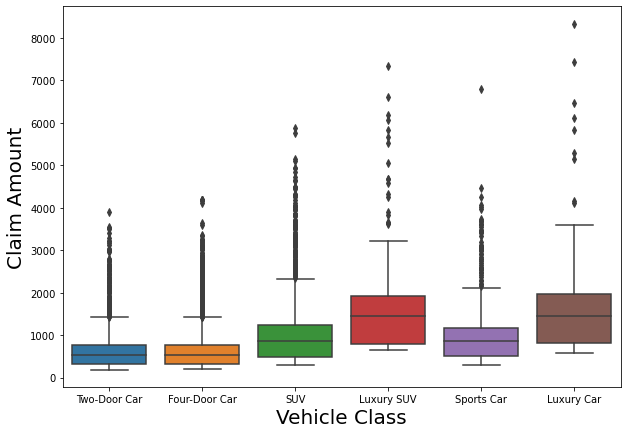

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='Vehicle Class', y='Claim Amount', data=dt)
plt.xlabel('Vehicle Class',size=20)
plt.ylabel('Claim Amount',size=20)

ANOVA

__Observation__  
1. Claim Amount Increases with vehicle class  
2. Two door and four door cars have very less outliers as compared to other classes
3. Our observation supports our assumption that Luxury cars, luxury SUV and Sports cars have higher claim amounts

<b>7. Maybe different locations have different type of claims (missori may have claims due to collision and xyz location may have claims due to hail etc)</b>

In [41]:
pd.crosstab(dt['State'],dt['Claim Reason']).apply(lambda x: x/x.sum(),axis=1)

Claim Reason,Collision,Hail,Other,Scratch/Dent
State,,,,
Iowa,0.413303,0.320646,0.111496,0.154556
Kansas,0.424812,0.310777,0.110276,0.154135
Missouri,0.405079,0.320635,0.111746,0.162540
Nebraska,0.408691,0.323547,0.112155,0.155608
Oklahoma,0.414966,0.320862,0.116780,0.147392


chi squqre

In [42]:
StateClaimReason = pd.crosstab(dt['State'],dt['Claim Reason'])
StateClaimReason

Claim Reason,Collision,Hail,Other,Scratch/Dent
State,,,,
Iowa,1075,834,290,402
Kansas,339,248,88,123
Missouri,1276,1010,352,512
Nebraska,696,551,191,265
Oklahoma,366,283,103,130


In [43]:
testStatistic, pVal, dof, contigencyTab = chi2_contingency(StateClaimReason)

In [44]:
print('Test Statistics', testStatistic, 'P-Value',pVal, 'contigencyTab', contigencyTab)

Test Statistics 2.515547271536547 P-Value 0.9981046105700003 contigencyTab [[1068.42040727  833.20845194  291.59448215  407.77665864]
 [ 327.79680315  255.63258156   89.46266696  125.10794832]
 [1293.93474929 1009.07597986  353.14210642  493.84716444]
 [ 699.54631049  545.54171228  190.92095467  266.99102255]
 [ 362.3017298   282.54127436   98.8797898   138.27720604]]


Cramers' V

In [45]:
cramers_corrected_stat(dt,testStatistic,StateClaimReason)

0.009582888841710853

__Observation__  
1. There seems no association between state and claim reason, around 40% claims are due to Collision in all the states, 30% are due to Hail,15%vare due to scratch or dent and 11% other.
2. Our assumption fails as value of cramer's v is 0.009, which is very near to zero,association is very weak.

<b> 8. Maybe different class of cars have different type of coverage.</b>

In [46]:
pd.crosstab(dt['Vehicle Class'],dt['Coverage'])

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,2795,1403,423
Luxury Car,92,49,22
Luxury SUV,94,64,26
SUV,1117,529,150
Sports Car,292,145,47
Two-Door Car,1178,552,156


In [47]:
pd.crosstab(dt['Vehicle Class'], dt['Coverage']).apply(lambda x: x/x.sum(), axis=1)

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,0.604847,0.303614,0.091539
Luxury Car,0.564417,0.300613,0.134969
Luxury SUV,0.510870,0.347826,0.141304
SUV,0.621938,0.294543,0.083519
Sports Car,0.603306,0.299587,0.097107
Two-Door Car,0.624602,0.292683,0.082715


Text(0.5, 0, 'Vehicle Class')

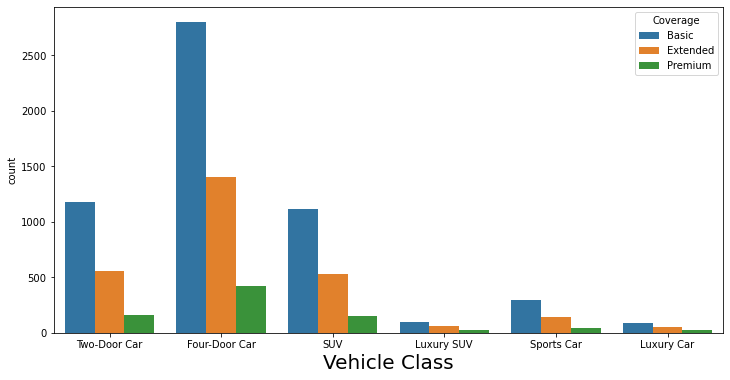

In [48]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='Vehicle Class',hue='Coverage',data=dt)
plt.xlabel('Vehicle Class',size=20)

__Observation:__  
There seems no association between Vehicle class and coverage.

ANOVA

<b>9. Maybe different class of cars have different type of policy.</b>

In [62]:
policyVehicleClass=pd.crosstab(dt['Vehicle Class'],dt['Policy'])

In [63]:
pd.crosstab(dt['Vehicle Class'],dt['Policy']).apply(lambda x: x/x.sum(),axis=1)

Policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
Vehicle Class,,,,,,,,,
Four-Door Car,0.041766,0.065354,0.107336,0.138498,0.227440,0.376975,0.007791,0.019260,0.015581
Luxury Car,0.042945,0.092025,0.110429,0.134969,0.171779,0.404908,0.006135,0.012270,0.024540
Luxury SUV,0.038043,0.065217,0.070652,0.179348,0.217391,0.396739,0.000000,0.027174,0.005435
SUV,0.038419,0.061804,0.118597,0.121381,0.244432,0.374165,0.008352,0.014477,0.018374
Sports Car,0.037190,0.055785,0.121901,0.144628,0.231405,0.357438,0.006198,0.030992,0.014463
Two-Door Car,0.034464,0.067869,0.113998,0.136267,0.239661,0.371156,0.005832,0.014316,0.016437


In [64]:
testStatistic, pVal, dof, contigencyTab = chi2_contingency(policyVehicleClass)

In [65]:
print('Test Statistics', testStatistic, 'P-Value',pVal, 'contigencyTab', contigencyTab)

Test Statistics 35.60937084495785 P-Value 0.6681348345629067 contigencyTab [[1.81622400e+02 3.01017626e+02 5.12994745e+02 6.27330852e+02
  1.07354522e+03 1.73325443e+03 3.33901905e+01 8.29695643e+01
  7.48749726e+01]
 [6.40650317e+00 1.06180206e+01 1.80952485e+01 2.21283118e+01
  3.78679658e+01 6.11383841e+01 1.17779724e+00 2.92664769e+00
  2.64112109e+00]
 [7.23188088e+00 1.19859864e+01 2.04265382e+01 2.49791986e+01
  4.27466608e+01 6.90151084e+01 1.32953799e+00 3.30370046e+00
  2.98138822e+00]
 [7.05894460e+01 1.16993650e+02 1.99380775e+02 2.43818699e+02
  4.17244581e+02 6.73647471e+02 1.29774469e+01 3.22469893e+01
  2.91009415e+01]
 [1.90229910e+01 3.15283556e+01 5.37306766e+01 6.57061528e+01
  1.12442303e+02 1.81539742e+02 3.49726297e+00 8.69016860e+00
  7.84234727e+00]
 [7.41267791e+01 1.22856361e+02 2.09372017e+02 2.56036786e+02
  4.38153273e+02 7.07404861e+02 1.36277644e+01 3.38629297e+01
  3.05592293e+01]]


Cramers' V

In [66]:
cramers_corrected_stat(dt,testStatistic,policyVehicleClass)

0.02793094036618278

__Observation:__  
The value of Cramer's V, that is calculated from chi square suggests that there is no significant association between vehicle class and policy.

<b>10. Those who are paying more premium will likely have more claim amount.</b>

Text(0, 0.5, 'Monthly Premiun Auto')

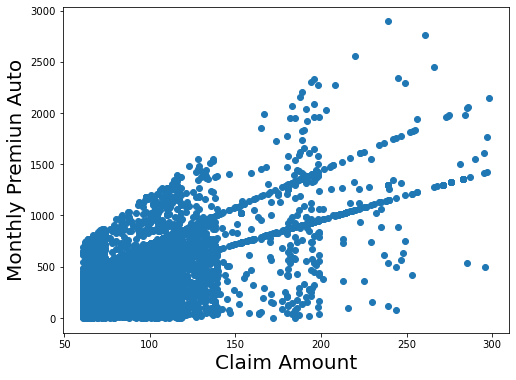

In [63]:
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x,y)
plt.xlabel('Claim Amount',size=20)
plt.ylabel('Monthly Premiun Auto',size=20)

In [64]:
dt['Claim Amount'].corr(dt['Monthly Premium Auto'])

0.39626173753402083

__Observation:__  
1. Correlation between 'Claim Amount' and 'Monthly Premium Auto' is 0.396.

<b>11. Number of policies can increase the chances of claims.</b>

In [67]:
dt['Number of Policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

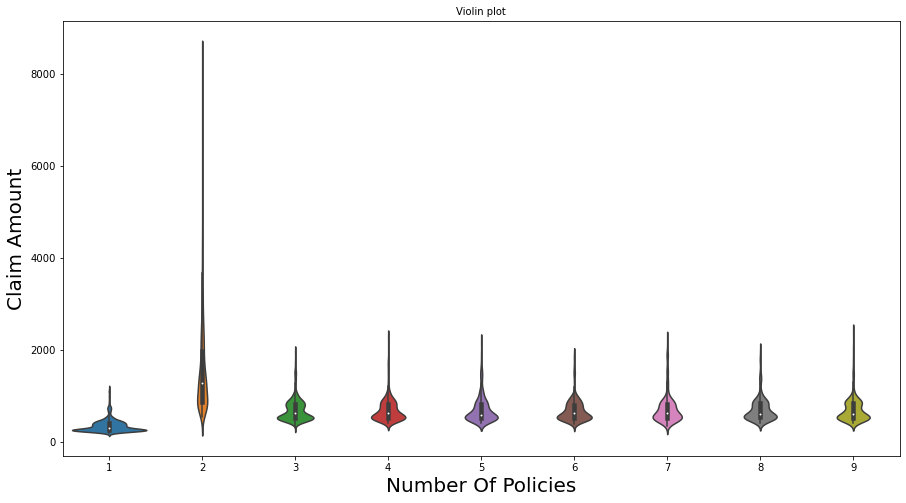

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.violinplot(x='Number of Policies', y='Claim Amount', data=dt, ax=ax)  
ax.set_title('Violin plot',size=10)
plt.xlabel('Number Of Policies',size=20)
plt.ylabel('Claim Amount',size=20)
plt.show() 

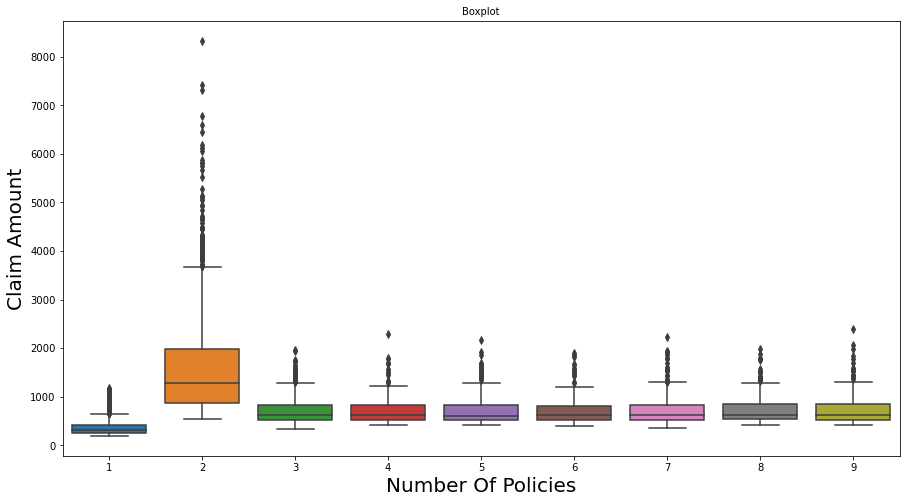

In [69]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Number of Policies', y='Claim Amount', data=dt, ax=ax)  
ax.set_title('Boxplot',size=10)
plt.xlabel('Number Of Policies',size=20)
plt.ylabel('Claim Amount',size=20)
plt.show() 

In [70]:
agg=dt.groupby(by=['Number of Policies'])['Claim Amount'].median().reset_index()

Text(0, 0.5, 'Claim Amount')

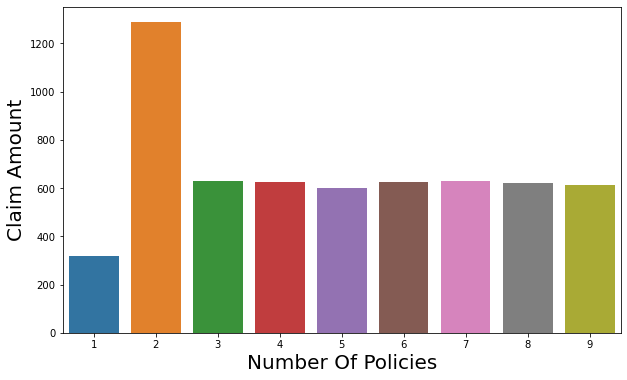

In [71]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='Number of Policies',y='Claim Amount',data=agg)
plt.xlabel("Number Of Policies",size=20)
plt.ylabel('Claim Amount',size=20)

__Observation:__  
1. Claim Amount is lowest where number of policies = 1
2. Claim Amount is Highest where numbr of policies is 2(unusual)

In [72]:
dt['Number of Policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

In [73]:
dt['Claim Amount'].corr(dt['Number of Policies'])

0.02195536449962672

In [74]:
temp=dt[dt['Number of Policies']==2]

In [75]:
temp['Claim Amount'].value_counts()

1131.520373    6
1163.889947    6
1179.049617    6
862.283537     6
4178.790343    6
              ..
1469.663549    1
901.581946     1
862.583699     1
1826.927017    1
4477.129936    1
Name: Claim Amount, Length: 2009, dtype: int64

(array([1.207e+03, 5.760e+02, 3.030e+02, 1.240e+02, 5.000e+01, 1.800e+01,
        7.000e+00, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 540.9955926 , 1320.14984524, 2099.30409788, 2878.45835052,
        3657.61260316, 4436.7668558 , 5215.92110844, 5995.07536108,
        6774.22961372, 7553.38386636, 8332.538119  ]),
 <a list of 10 Patch objects>)

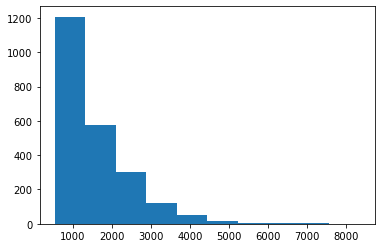

In [76]:
x=temp['Claim Amount']
plt.hist(x)

In [77]:
temp['Claim Amount'].describe()

count    2294.000000
mean     1572.317794
std       930.086625
min       540.995593
25%       864.242193
50%      1287.668762
75%      1991.695533
max      8332.538119
Name: Claim Amount, dtype: float64

In [85]:
temp1=dt[dt['Number of Policies']==1]

In [86]:
temp1['Claim Amount'].describe()

count    3251.000000
mean      360.695510
std       141.232389
min       189.800768
25%       261.661390
50%       316.765844
75%       419.735738
max      1170.106985
Name: Claim Amount, dtype: float64

(array([1346.,  808.,  701.,  196.,   51.,   82.,   27.,   12.,   10.,
          18.]),
 array([ 189.8007675 ,  287.83138925,  385.862011  ,  483.89263275,
         581.9232545 ,  679.95387625,  777.984498  ,  876.01511975,
         974.0457415 , 1072.07636325, 1170.106985  ]),
 <a list of 10 Patch objects>)

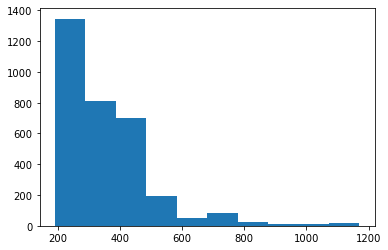

In [87]:
x=temp1['Claim Amount']
plt.hist(x)

<b>12. Those who have high claim amount will unlikely have basic type of coverage</b>

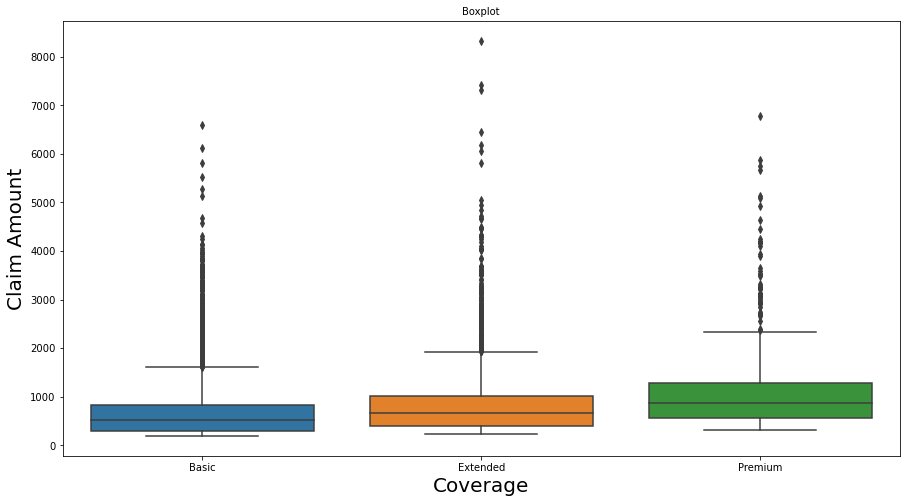

In [78]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Coverage', y='Claim Amount', data=dt, ax=ax)  
ax.set_title('Boxplot',size=10)
plt.xlabel('Coverage',size=20)
plt.ylabel('Claim Amount',size=20)
plt.show() 

In [79]:
agg=dt.groupby(by=['Coverage'])['Claim Amount'].median().reset_index()

Text(0, 0.5, 'Claim Amount')

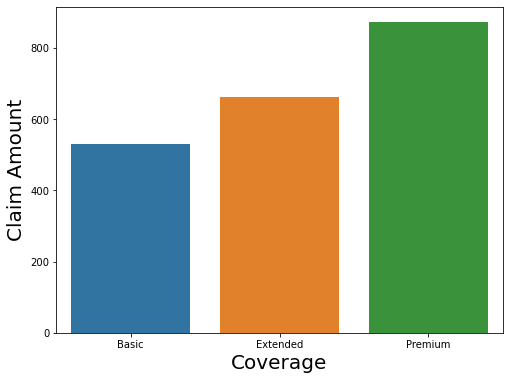

In [80]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='Coverage',y='Claim Amount',data=agg)
plt.xlabel("Coverage",size=20)
plt.ylabel('Claim Amount',size=20)

__Observation:__  
The above graph show increase in claim amount with type of coverage

ANOVA/Biserial

<b>13. The claims amount might increase with the number of months since last claims.</b>

In [75]:
agg=dt.groupby(by=['Months Since Last Claim'])['Claim Amount'].median().reset_index()

Text(0, 0.5, 'Claim Amount')

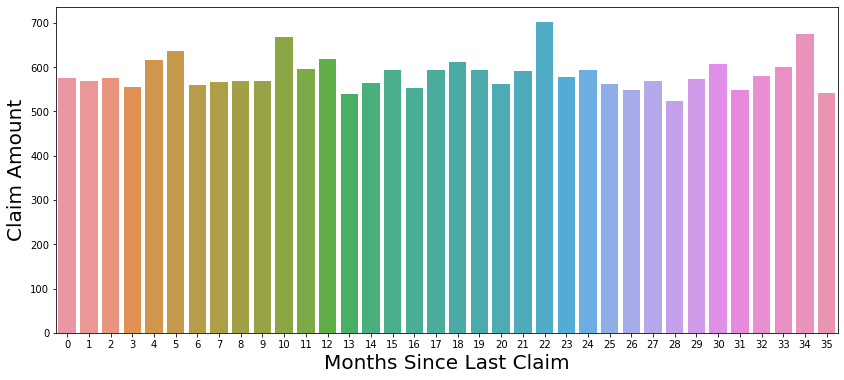

In [77]:
fig,ax=plt.subplots(figsize=(14,6))
sns.barplot(x='Months Since Last Claim',y='Claim Amount',data=agg)
plt.xlabel("Months Since Last Claim",size=20)
plt.ylabel('Claim Amount',size=20)

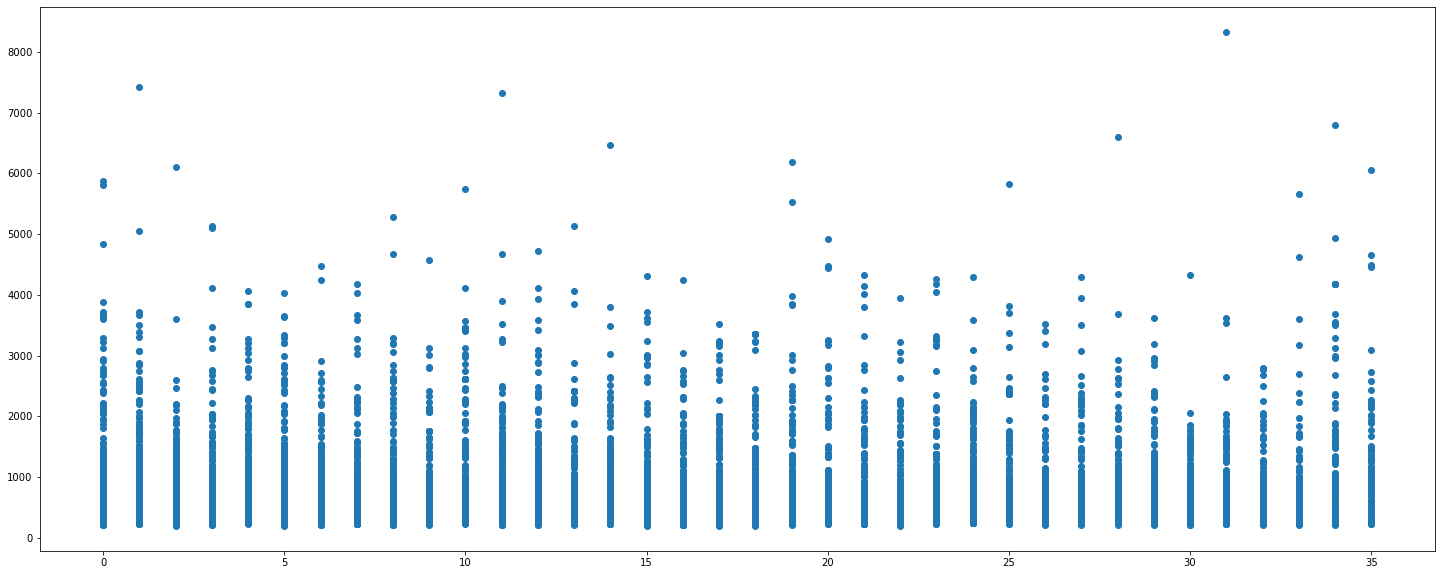

In [120]:
x=dt['Months Since Last Claim']
y=dt['Claim Amount']
fig,ax=plt.subplots(figsize=(25,10))
plt.scatter(x,y)

In [78]:
dt['Claim Amount'].corr(dt['Months Since Last Claim'])

0.011516681893212056

__Observation:__  
It can be seen from the graph and from the correlation that there is no significant amount of correlation between claim amount and months since last claim.

<b>14. Age of policy might have an impact on the claims amount</b>

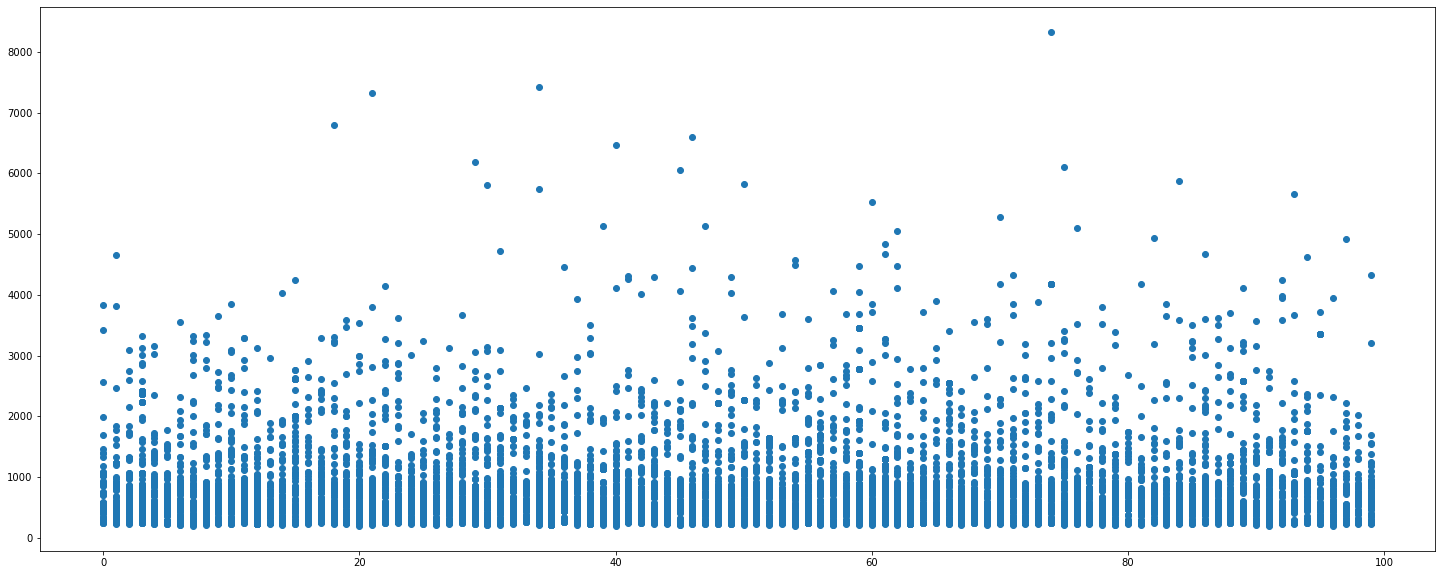

In [119]:
x=dt['Months Since Policy Inception']
y=dt['Claim Amount']
fig,ax=plt.subplots(figsize=(25,10))
plt.scatter(x,y)

In [92]:
dt['Claim Amount'].corr(dt['Months Since Policy Inception'])

0.009418381244490766

__Observation:__  
Our assumption was wrong as It can be seen from the graph and from the correlation that there is no significant amount of correlation between claim amount and months since policy inception.

-------------------------

---------------

### Assumptions to begin

1. Employeed will have high premium amount that is why they have high claim amount.
2. Monthly premium increases with increased number of policies  
3. Different claim reasons might have different range of claim amount
4. Monthly premium Auto might have strong correlation with total Claim amount
5. Claim Amount may vary with total Claim Amount
6. Number of open Complaints might increase the claim amount
7. Married male customers would have hoigher claim amount
8. Claim Amount Increases with increased numer of complaints9. Claim Amount will vary with the reason of claim


1. Employeed will have high premium amount that is why they have high claim amount.

In [ ]:
dt['Monthly Premium Auto']

In [29]:
agg = dt.groupby(by=['Monthly Premium Auto','EmploymentStatus'])['Claim Amount'].count().reset_index().rename(columns={'Claim Amount':'count'})

Text(0, 0.5, 'Count')

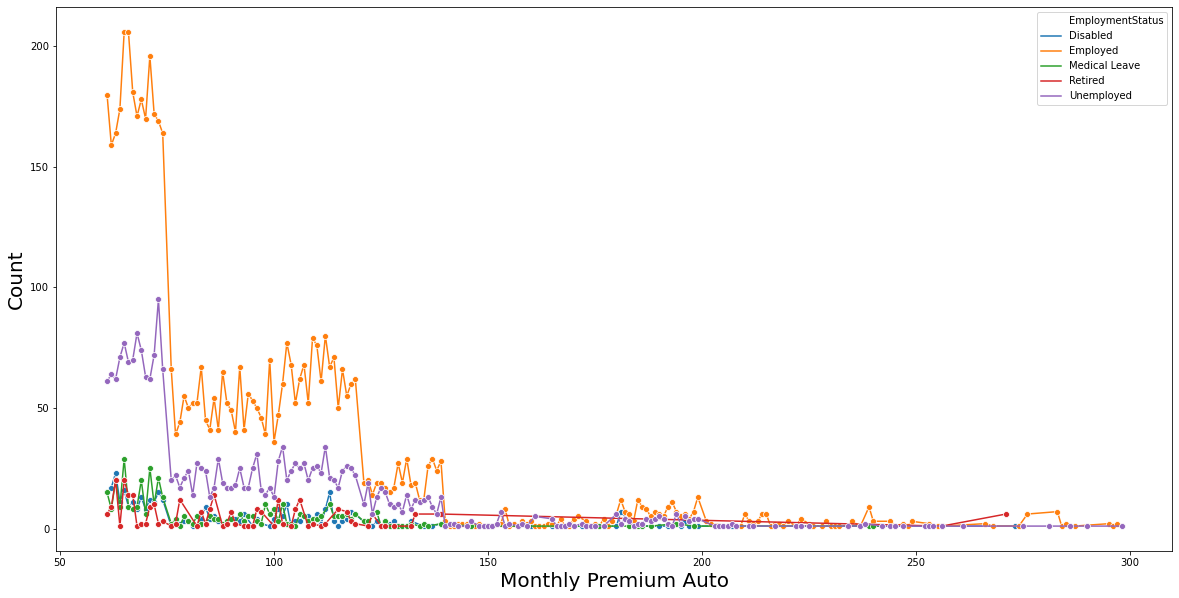

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='Monthly Premium Auto',y='count',hue='EmploymentStatus',marker='o',data=agg)
plt.xlabel('Monthly Premium Auto',size=20)
plt.ylabel('Count',size=20)

In [39]:
dt['Claim Amount'].describe()

count    9134.000000
mean      800.494047
std       687.096761
min       189.800768
25%       399.425179
50%       578.018220
75%       896.216704
max      8332.538119
Name: Claim Amount, dtype: float64

2. Monthly premium increases with increased number of policies

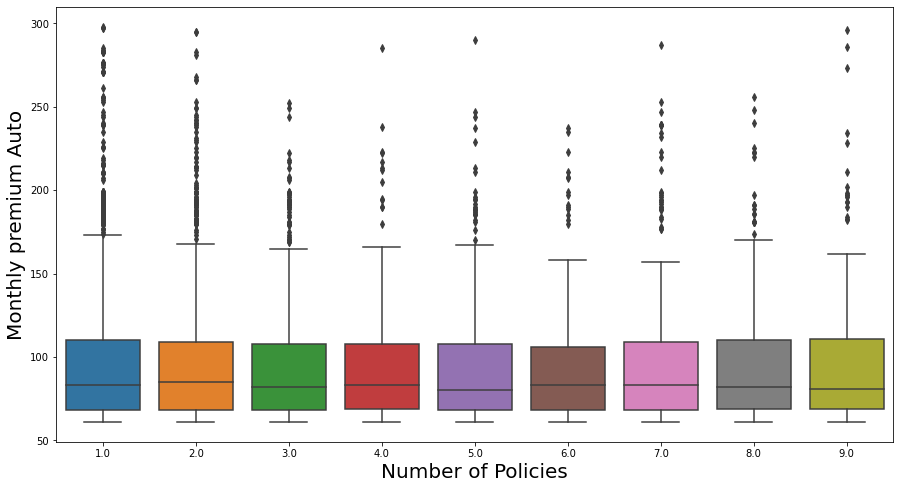

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Number of Policies', y='Monthly Premium Auto', data=dt, ax=ax)  
plt.xlabel('Number of Policies',size=20)
plt.ylabel('Monthly premium Auto',size=20)
plt.show() 

In [16]:
dt['Number of Policies']=dt['Number of Policies'].astype('float64')

In [19]:
dt['Number of Policies'].describe()

count    9134.000000
mean        2.966170
std         2.390182
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

In [56]:
dt['Number of Policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

In [51]:
dt['Number of Policies'].value_counts()/len(dt)*100

1    35.592293
2    25.114955
3    12.787388
7     4.740530
9     4.554412
4     4.477775
5     4.455879
8     4.204073
6     4.072695
Name: Number of Policies, dtype: float64

In [52]:
temp=dt[dt['Number of Policies']==2]

In [57]:
temp['Claim Amount'].sum()

3606897.0187207004

3. Different claim reasons might have different range of claim amount

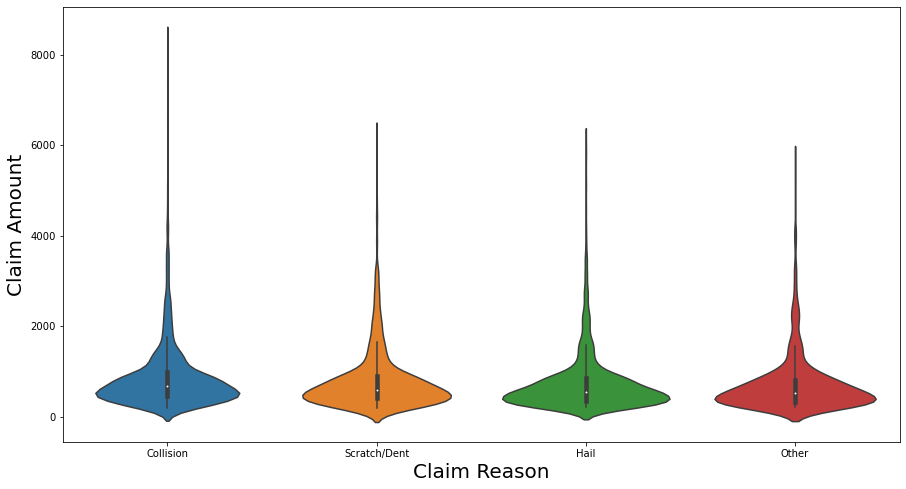

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.violinplot(x='Claim Reason', y='Claim Amount', data=dt, ax=ax)  
plt.xlabel('Claim Reason',size=20)
plt.ylabel('Claim Amount',size=20)
plt.show() 

4. Monthly premium Auto might have strong correlation with total Claim amount

In [23]:
dt['Total Claim Amount'].corr(dt['Monthly Premium Auto'])

0.6320166625194122

In [62]:
dt['Monthly Premium Auto']=dt['Monthly Premium Auto'].astype(np.int32)

In [ ]:
#sns.catplot(x="Marital Status", y="Claim Amount", hue="Gender", kind="swarm", data=dt)

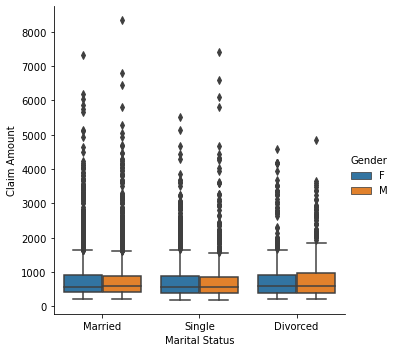

In [106]:
sns.catplot(x="Marital Status", y="Claim Amount", hue="Gender", kind="box", data=dt);

In [77]:
agg = dt.groupby(by=['Monthly Premium Auto'])['Claim Amount'].median().reset_index()

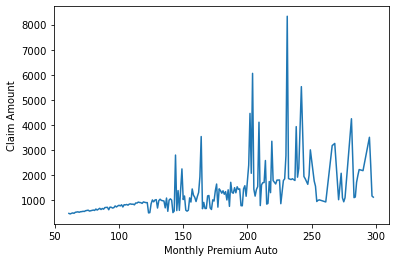

In [79]:
fig,ax=plt.subplots(figsize=)
sns.lineplot(x=agg['Monthly Premium Auto'],y=agg['Claim Amount'])

In [45]:
agg = dt.groupby(by=['EmploymentStatus','Gender'])['Claim Amount'].median().reset_index()

Text(0, 0.5, 'Claim Amount')

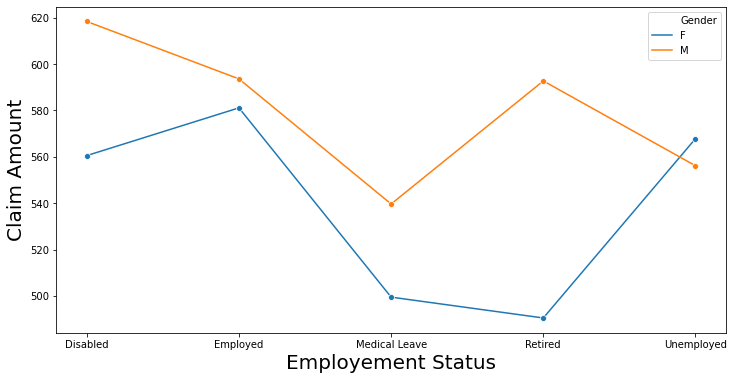

In [46]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x='EmploymentStatus',y='Claim Amount',hue='Gender', marker='o',data =agg)
plt.xlabel('Employement Status',size=20)
plt.ylabel('Claim Amount',size=20)

In [40]:
agg = dt.groupby(by=['Marital Status','Gender'])['Claim Amount'].median().reset_index()

Text(0, 0.5, 'Claim Amount')

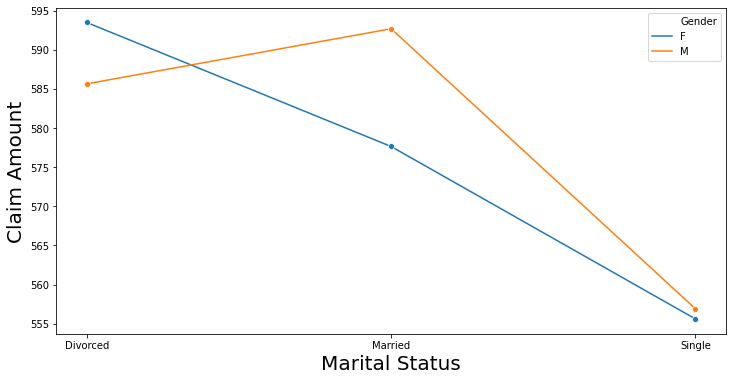

In [43]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x='Marital Status',y='Claim Amount',hue='Gender', marker='o',data =agg)
plt.xlabel('Marital Status',size=20)
plt.ylabel('Claim Amount',size=20)

In [44]:
pd.crosstab(dt['Vehicle Class'],dt['Vehicle Size']).apply(lambda r: r/r.sum(), axis=1)

Vehicle Size,Large,Medsize,Small
Vehicle Class,,,
Four-Door Car,0.102792,0.700498,0.196711
Luxury Car,0.098160,0.650307,0.251534
Luxury SUV,0.097826,0.679348,0.222826
SUV,0.092984,0.728285,0.178731
Sports Car,0.101240,0.756198,0.142562
Two-Door Car,0.117179,0.679745,0.203075


In [72]:
vehicleCrossTab = pd.crosstab(dt['Vehicle Class'],dt['Vehicle Size'])
vehicleCrossTab

Vehicle Size,Large,Medsize,Small
Vehicle Class,,,
Four-Door Car,475,3237,909
Luxury Car,16,106,41
Luxury SUV,18,125,41
SUV,167,1308,321
Sports Car,49,366,69
Two-Door Car,221,1282,383


In [73]:
testStatistic, pVal, dof, contigencyTab = chi2_contingency(vehicleCrossTab)

In [77]:
print('Test Statistics', testStatistic, 'P-Value',pVal, 'contigencyTab', contigencyTab)

Test Statistics 24.66171915875752 P-Value 0.006024951458906972 contigencyTab [[ 478.59273046 3249.97854171  892.42872783]
 [  16.88176046  114.63893146   31.47930808]
 [  19.05671119  129.40836435   35.53492446]
 [ 186.01007226 1263.1381651   346.85176265]
 [  50.12743595  340.40026275   93.47230129]
 [ 195.33128969 1326.43573462  364.2329757 ]]


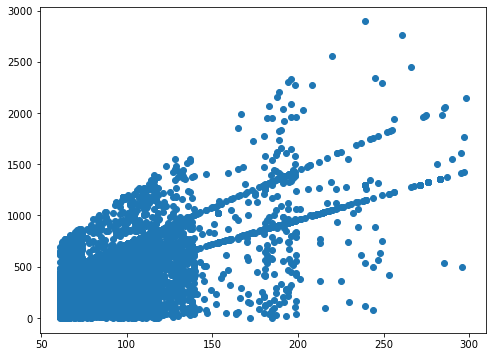

In [53]:
x=dt['Monthly Premium Auto']
y= dt['Total Claim Amount']
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x,y)

In [54]:
dt['Total Claim Amount'].corr(dt['Monthly Premium Auto'])

0.6320166625194122

----------------------------

---------------------